In [1]:
import os, gc
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.offline as py

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

py.init_notebook_mode(connected=True)

In [2]:
batch_size = 64
SEED = 444

In [3]:
# os.listdir('../input/kuzushiji')

train_set = np.load(r'datasets\archive (2)\kmnist-train-imgs.npz')['arr_0']
train_labels = np.load(r'datasets\archive (2)\kmnist-train-labels.npz')['arr_0']

test_set = np.load(r'datasets\archive (2)\kmnist-test-imgs.npz')['arr_0']
test_labels = np.load(r'datasets\archive (2)\kmnist-test-labels.npz')['arr_0']
num_class = len(np.unique(train_labels))
                
train_labels = to_categorical(train_labels, num_class)
test_labels = to_categorical(test_labels, num_class)

In [4]:
train_set, validation_set, train_labels, validation_labels = train_test_split(train_set, train_labels, test_size = 0.1, random_state = SEED)

In [5]:
train_set = train_set.reshape(train_set.shape[0], train_set.shape[1], train_set.shape[2], 1)/255
validation_set = validation_set.reshape(validation_set.shape[0], validation_set.shape[1], validation_set.shape[2], 1)/255
test_set = test_set.reshape(test_set.shape[0], test_set.shape[1], test_set.shape[2], 1)/255

In [6]:
print(f"""
Train set dimensions: {train_set.shape}
Validation set dimensions: {validation_set.shape}
Test set dimensions: {test_set.shape}
""")


Train set dimensions: (54000, 28, 28, 1)
Validation set dimensions: (6000, 28, 28, 1)
Test set dimensions: (10000, 28, 28, 1)



In [7]:
model = Sequential()
# primera capa
model.add(Conv2D(32,(5,5),activation = 'relu', input_shape = (28,28,1), padding="same"))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
# segunda capa
model.add(Conv2D(64,(5,5),activation = 'relu'))
# tercera capa
model.add(Conv2D(64,(5,5),activation = 'relu'))
model.add(Flatten())
# cuarta capa
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.4))
# quinta capa
model.add(Dense(num_class,activation = 'softmax', kernel_regularizer='l2'))

model.summary()
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        51264     
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 64)          102464    
                                                                 
 flatten (Flatten)           (None, 2304)              0

In [8]:
history = model.fit(train_set,train_labels,
                    epochs=15,
                    batch_size=batch_size,
                    verbose = 1,
                    validation_data = (validation_set,validation_labels))

Epoch 1/15
844/844 [==============================] - 36s 42ms/step - loss: 0.4002 - accuracy: 0.9022 - val_loss: 0.1457 - val_accuracy: 0.9690
Epoch 2/15
844/844 [==============================] - 36s 42ms/step - loss: 0.1358 - accuracy: 0.9696 - val_loss: 0.0877 - val_accuracy: 0.9815
Epoch 3/15
844/844 [==============================] - 36s 42ms/step - loss: 0.0889 - accuracy: 0.9799 - val_loss: 0.0723 - val_accuracy: 0.9858
Epoch 4/15
844/844 [==============================] - 36s 43ms/step - loss: 0.0669 - accuracy: 0.9848 - val_loss: 0.0816 - val_accuracy: 0.9818
Epoch 5/15
844/844 [==============================] - 36s 42ms/step - loss: 0.0579 - accuracy: 0.9861 - val_loss: 0.0796 - val_accuracy: 0.9827
Epoch 6/15
844/844 [==============================] - 35s 42ms/step - loss: 0.0475 - accuracy: 0.9885 - val_loss: 0.0663 - val_accuracy: 0.9867
Epoch 7/15
844/844 [==============================] - 34s 41ms/step - loss: 0.0430 - accuracy: 0.9896 - val_loss: 0.0668 - val_accuracy:

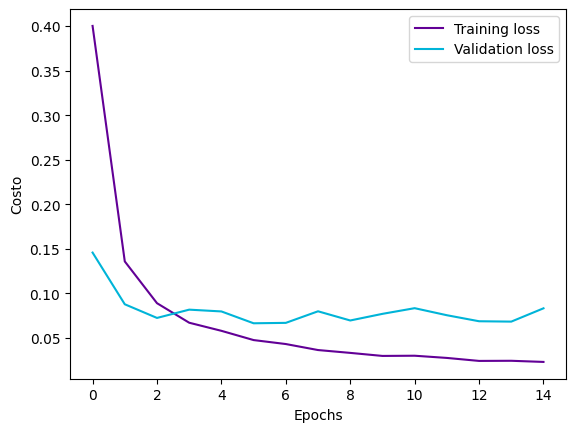

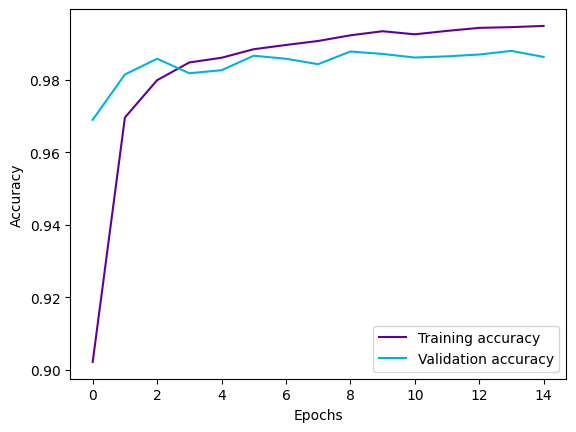

In [9]:
plt.plot(history.history['loss'], label = 'Training loss', color = '#620096')
plt.plot(history.history['val_loss'], label = 'Validation loss', color = '#00b4d8')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Costo')
plt.show()

plt.plot(history.history['accuracy'], label = 'Training accuracy', color = '#620096')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy', color = '#00b4d8')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [10]:
history.history

print("Evaluate model on test data")
results = model.evaluate(test_set, test_labels, batch_size=batch_size)
print("test loss, test acc:", results)

# Generate a prediction using model.predict() 
# and calculate it's shape:
print("Generate a prediction")
prediction = model.predict(test_set[:1])
print("prediction shape:", prediction.shape)

Evaluate model on test data
157/157 [==============================] - 2s 11ms/step - loss: 0.2081 - accuracy: 0.9648
test loss, test acc: [0.20810988545417786, 0.9648000001907349]
Generate a prediction
1/1 [==============================] - 0s 113ms/step
prediction shape: (1, 10)


In [11]:
import numpy as np
import cv2

In [13]:
from joblib import Parallel, delayed
import joblib
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

AttributeError: Can't get attribute 'ConvNet' on <module '__main__'>